In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv(r'C:\Users\user\Downloads\titanic\train.csv')
test = pd.read_csv(r'C:\Users\user\Downloads\titanic\test.csv')
sample = pd.read_csv(r'C:\Users\user\Downloads\titanic\gender_submission.csv')

In [4]:
train_original=train.copy()
test_original=test.copy()

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train.shape, test.shape

((891, 12), (418, 11))

**Identify missing column in test**

In [8]:
train.columns.difference(test.columns)

Index(['Survived'], dtype='object')

**So Survived column is Target**

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Categorical features: These features have categories (Sex, Cabin, Embarked)

Ordinal features: Variables in categorical features having some order involved (P Class)

Numerical features: These features have numerical values (Passenger ID, Age, SibSp, Parch, Fare)

In [10]:
train.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [11]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**AGE, Cabin and Embarked has Null values**

In [12]:
train.duplicated().sum()

0

In [13]:
train['Pclass'].value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
train['Sex'].value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [15]:
train['Age'].value_counts(dropna=False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 89, dtype: int64

In [16]:
train['SibSp'].value_counts(dropna=False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [17]:
train['Parch'].value_counts(dropna=False)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [18]:
train['Ticket'].value_counts(dropna=False)

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [19]:
train['Fare'].value_counts(dropna=False)

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [20]:
train['Cabin'].value_counts(dropna=False)

NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [21]:
train['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [22]:
train['Survived'].value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

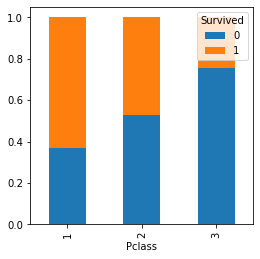

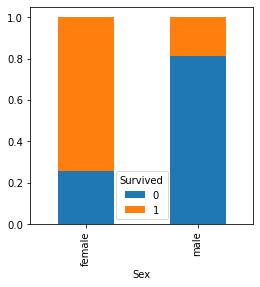

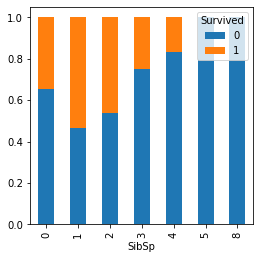

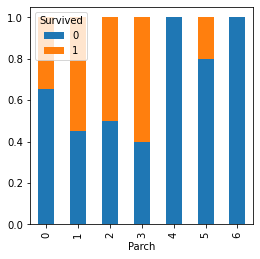

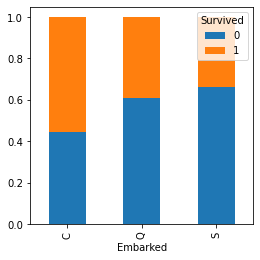

In [23]:
Pclass=pd.crosstab(train['Pclass'],train['Survived'])
Sex=pd.crosstab(train['Sex'],train['Survived'])
SibSp=pd.crosstab(train['SibSp'],train['Survived'])
Parch=pd.crosstab(train['Parch'],train['Survived'])
Embarked=pd.crosstab(train['Embarked'],train['Survived'])
Pclass.div(Pclass.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Sex.div(Sex.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
SibSp.div(SibSp.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Parch.div(Parch.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Embarked.div(Embarked.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

survival - Survival (0 = No; 1 = Yes)

class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

name - Name

sex - Sex

age - Age

sibsp - Number of Siblings/Spouses Aboard

parch - Number of Parents/Children Aboard

ticket - Ticket Number

fare - Passenger Fare

cabin - Cabin

embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

**Inference**
1. Most of the First Class passangers have survived
2. Most of the female passangers have survived
3. SibSp with No, 1 and 2 have mostly survived
4. Parch with No, 1,2 and 3 have mostly survived
5. Passangers who have boarded in Cherbourg port have survived the most

### CORRELATION BETWEEN ALL THE NUMERICAL VARIABLES

<AxesSubplot:>

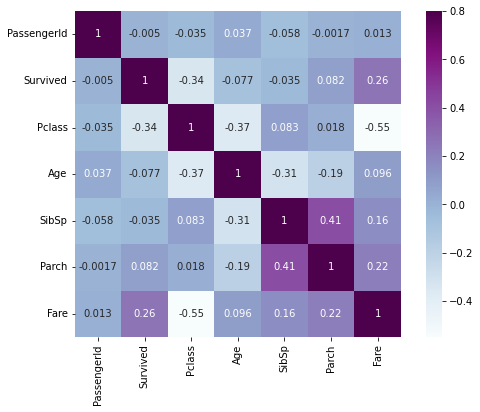

In [24]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

In [25]:
data = pd.concat([train,test])

In [26]:
display(data.head(1), data.tail(1))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


**Reset the index after concatenation to avoid Duplication**

In [27]:
data.reset_index(inplace=True, drop=True)
display(data.head(1), data.tail(1))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [28]:
train.shape[0], test.shape[0], train.shape[0] + test.shape[0] , data.shape[0]

(891, 418, 1309, 1309)

In [29]:
data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### Handling the missing/null values

In [30]:
data = data.drop(columns='Cabin', axis=1)

In [31]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Fare'].fillna(data['Fare'].mean(), inplace=True)

In [32]:
print(data['Embarked'].mode())

0    S
dtype: object


In [33]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [34]:
data.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [35]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Encoding of Categorical Data

In [36]:
data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [37]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


### Dropping Insignificant columns

In [38]:
prepc_train= data[data['Survived'].notna()]
prepc_test = data[data['Survived'].isna()]

In [39]:
prepc_train.to_csv(r'C:\Users\user\Downloads\titanic\preprocessed_train_data.csv',index=False)
prepc_test.to_csv(r'C:\Users\user\Downloads\titanic\preprocessed_test_data.csv',index=False)

###  Model building - Logistic Regression

In [40]:
pptrain = pd.read_csv(r'C:\Users\user\Downloads\titanic\preprocessed_train_data.csv')

In [41]:
x = pptrain.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
y = pptrain['Survived']

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [43]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

**Predic the values for our Train and test accurancy from our Train Data** 

In [44]:
x_train_prediction = logmodel.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)*100
print('Accuracy score of training data : ', training_data_accuracy)
print('confusion_matrix\n:' , confusion_matrix(y_train , x_train_prediction))

Accuracy score of training data :  80.89887640449437
confusion_matrix
: [[391  58]
 [ 78 185]]


In [45]:
x_test_prediction = logmodel.predict(x_test)
test_data_accuracy = accuracy_score(y_test, x_test_prediction)*100
print('Accuracy score of test data : ', test_data_accuracy)
print('confusion_matrix\n:' , confusion_matrix(y_test , x_test_prediction))

Accuracy score of test data :  78.2122905027933
confusion_matrix
: [[91  9]
 [30 49]]


In [46]:
pptest = pd.read_csv(r'C:\Users\user\Downloads\titanic\preprocessed_test_data.csv')

In [47]:
pptest_X = pptest.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
pred_test=logmodel.predict(pptest_X).astype(int)

In [48]:
submissioncsv=pd.DataFrame({"PassengerId":test_original["PassengerId"],"Survived":pred_test})
submissioncsv

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [49]:
pd.DataFrame(submissioncsv, columns=['PassengerId','Survived']).to_csv(r'C:\Users\user\Downloads\titanic\Titanic_Survival_Logreg_output.csv')

In [ ]:
#Acccuracy Score using Logestic Regression in Kaggle - 0.77272

### Model Building - Decision Tree

In [50]:
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [51]:
model = DecisionTreeClassifier()

In [52]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
x_test_Dec_prediction = model.predict(x_test)
DecTree_test_data_accuracy = accuracy_score(y_test, x_test_Dec_prediction)*100
print('Accuracy score of test data : ', DecTree_test_data_accuracy)
print('confusion_matrix\n:' , confusion_matrix(y_test , x_test_Dec_prediction))

Accuracy score of test data :  79.3296089385475
confusion_matrix
: [[85 15]
 [22 57]]


In [54]:
x_train_Dec_prediction = model.predict(x_train)
DecTree_training_data_accuracy = accuracy_score(y_train, x_train_Dec_prediction)*100
print('Accuracy score of training data : ', DecTree_training_data_accuracy)
print('confusion_matrix\n:' , confusion_matrix(y_train , x_train_Dec_prediction))

Accuracy score of training data :  98.59550561797754
confusion_matrix
: [[448   1]
 [  9 254]]


In [55]:
pred_test_DecTree=model.predict(pptest_X).astype(int)

In [56]:
submissioncsv_DecTree=pd.DataFrame({"PassengerId":test_original["PassengerId"],"Survived":pred_test_DecTree})
submissioncsv_DecTree

,PassengerId,Survived
0,892,1
1,893,0
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [57]:
pd.DataFrame(submissioncsv_DecTree, columns=['PassengerId','Survived']).to_csv(r'C:\Users\user\Downloads\titanic\Titanic_Survival_DecTree_output.csv')

In [ ]:
#Accuracy Score using Decision Tree is - 0.72488